# Importing Lib

In [38]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os
from thop import profile
import torch
import seaborn as sns
import pandas as pd


%matplotlib inline

## Import pretrained Models From YAML file, with predefined weights

In [39]:
# Loading from predownloaded models
nano_model = YOLO("models/yolov5nu.pt")
small_model = YOLO("models/yolov5su.pt")
medium_model = YOLO("models/yolov5mu.pt")
large_model = YOLO("models/yolov5lu.pt")


In [40]:
# Display each models layers
# Outputs the architecture of the model: Layers, parameters and GFLOPs
nano_model.info()
small_model.info()
medium_model.info()
large_model.info()


YOLOv5n summary: 153 layers, 2,654,816 parameters, 0 gradients, 7.8 GFLOPs
YOLOv5s summary: 153 layers, 9,153,152 parameters, 0 gradients, 24.2 GFLOPs
YOLOv5m summary: 197 layers, 25,111,456 parameters, 0 gradients, 64.6 GFLOPs
YOLOv5l summary: 241 layers, 53,225,024 parameters, 0 gradients, 135.6 GFLOPs


(241, 53225024, 0, 135.62496)

### Training with coco8 dataset with 10 epochs (Optional)

With current hardware environment the model training takes a long time with no GPU processing power. Even with reducing the epochs, which affects the model's performance it takes a decent amount of time.

Change each markdown cell into code cells if you want to train.

results = nano_model.train(data="coco8.yaml", epochs=10, imgsz=640)

results = small_model.train(data="coco8.yaml", epochs=10, imgsz=640)

results = medium_model.train(data="coco8.yaml", epochs=10, imgsz=640)

results = large_model.train(data="coco8.yaml", epochs=10, imgsz=640)

### Displaying model's prediciton with a validation image 

To verify the model works and can predict


image 1/1 c:\Users\User\Downloads\School Video Images\Ryerson Eigth Term\CPS843Final\cps843Final\datasets\coco8\images\val\000000000036.jpg: 640x512 1 person, 1 umbrella, 60.2ms
Speed: 0.9ms preprocess, 60.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 512)


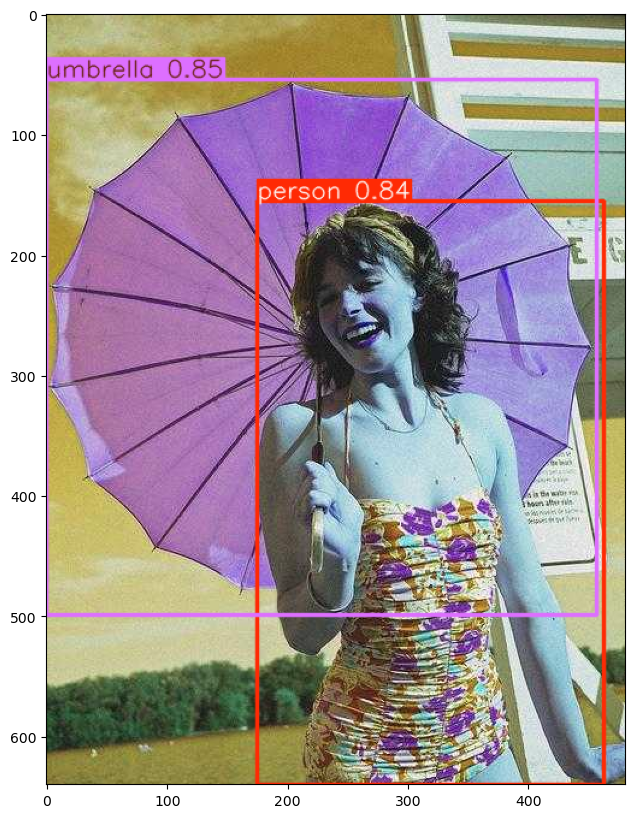

In [41]:
results = nano_model.predict("datasets/coco8/images/val/000000000036.jpg")

img = results[0].plot()
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()


image 1/1 c:\Users\User\Downloads\School Video Images\Ryerson Eigth Term\CPS843Final\cps843Final\datasets\coco8\images\val\000000000036.jpg: 640x512 1 person, 1 umbrella, 84.1ms
Speed: 1.0ms preprocess, 84.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 512)


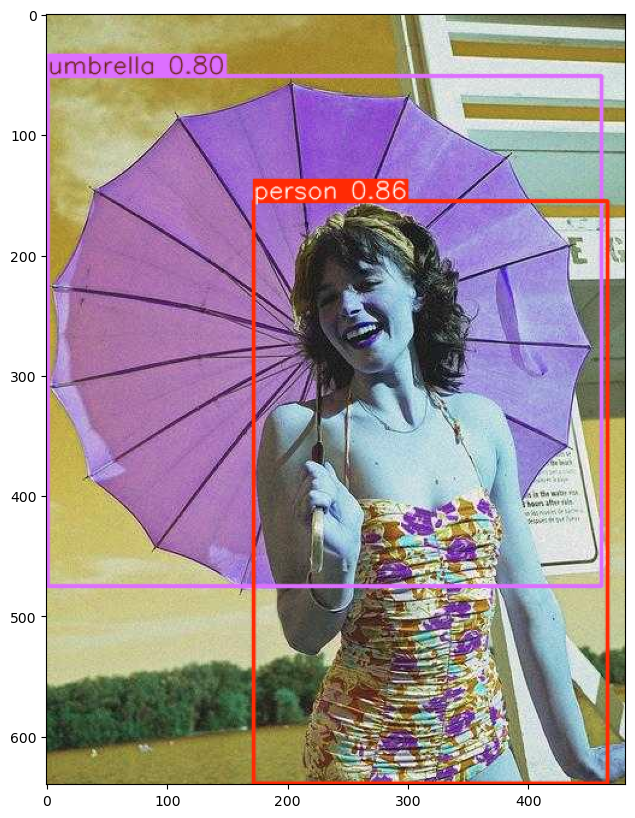

In [42]:
results = small_model.predict("datasets/coco8/images/val/000000000036.jpg")

img = results[0].plot()
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()


image 1/1 c:\Users\User\Downloads\School Video Images\Ryerson Eigth Term\CPS843Final\cps843Final\datasets\coco8\images\val\000000000036.jpg: 640x512 1 person, 1 umbrella, 181.6ms
Speed: 1.4ms preprocess, 181.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 512)


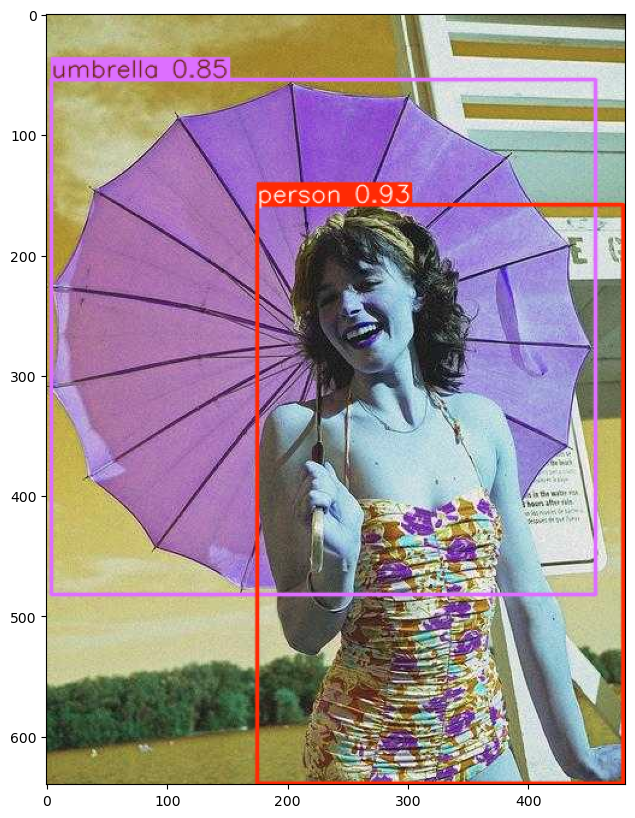

In [43]:
results = medium_model.predict("datasets/coco8/images/val/000000000036.jpg")

img = results[0].plot()
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()


image 1/1 c:\Users\User\Downloads\School Video Images\Ryerson Eigth Term\CPS843Final\cps843Final\datasets\coco8\images\val\000000000036.jpg: 640x512 1 person, 1 umbrella, 324.0ms
Speed: 1.6ms preprocess, 324.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 512)


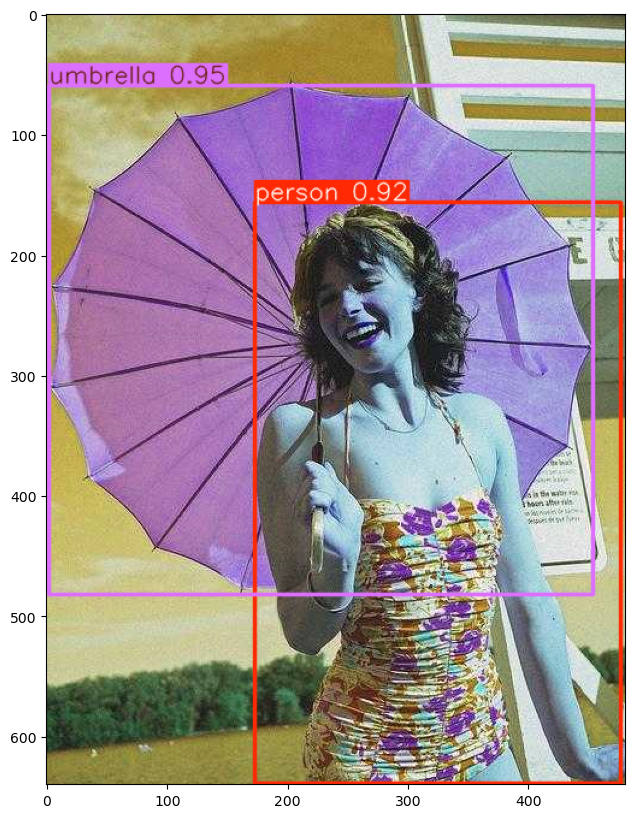

In [44]:
results = large_model.predict("datasets/coco8/images/val/000000000036.jpg")

img = results[0].plot()
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

### Getting scores for each model

In [45]:
# Setting up a dictionary to hold the models
models = {
    "YOLOv5n": nano_model,
    "YOLOv5s": small_model,
    "YOLOv5m": medium_model,
    "YOLOv5l": large_model
}

# Dictionary to hold model metrics
model_metrics = {}

In [46]:
for name, model in models.items():
    print(f"Evaluating {name}:")
    
    # Validation metrics (mAP50-95, precision, recall, speed)
    val_results = model.val(data="coco8.yaml")

    # Model size
    model_size_MB = os.path.getsize('models/' + name.lower()  + 'u.pt') / (1024*1024)
    
    # FLOPs and parameters
    pt_model = model.model  # get torch.nn.Module
    input_tensor = torch.randn(1, 3, 640, 640)  # batch_size=1, RGB, 640x640
    flops, params = profile(pt_model, inputs=(input_tensor,), verbose=False)

    f1_score = 2 * (val_results.box.mp * val_results.box.mr) / (val_results.box.mp + val_results.box.mr)

    # Store all info in dict
    model_metrics[name] = {
        "mAP50-95": val_results.box.map,
        "mPrecision": val_results.box.mp,
        "mRecall": val_results.box.mr,
        "F1": f1_score,
        "speed_ms": sum(val_results.speed.values()),
        "model_size_MB": model_size_MB,
        "GFLOPs": flops/1000000000,  # Convert to GFLOPs
        "num_params": params
    }

Evaluating YOLOv5n:
Ultralytics 8.3.231  Python-3.11.11 torch-2.9.1+cpu CPU (AMD Ryzen 5 5600 6-Core Processor)
val: Fast image access  (ping: 0.00.0 ms, read: 533.8229.5 MB/s, size: 54.0 KB)
val: Scanning C:\Users\User\Downloads\School Video Images\Ryerson Eigth Term\CPS843Final\cps843Final\datasets\coco8\labels\val.cache... 4 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 4/4  0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.3it/s 0.2s
                   all          4         17      0.802      0.667      0.901      0.628
                person          3         10      0.812        0.5      0.595      0.301
                   dog          1          1          1          0      0.995      0.697
                 horse          1          2      0.772          1      0.995      0.747
              elephant          1          2      0.914        0.5      0.828      0.335
              umbrella          1     

In [47]:
# Print results nicely
for name, metrics in model_metrics.items():
    print(f"\n{name}:")
    for key, value in metrics.items():
        print(f"  {key}: {value}")


YOLOv5n:
  mAP50-95: 0.6284752778177719
  mPrecision: 0.8022454089723051
  mRecall: 0.6666666666666666
  F1: 0.7281991638819554
  speed_ms: 43.532075000257464
  model_size_MB: 5.305060386657715
  GFLOPs: 3.8630656
  num_params: 2649200.0

YOLOv5s:
  mAP50-95: 0.6674819539686173
  mPrecision: 0.7722067784385542
  mRecall: 0.8527159304423565
  F1: 0.8104668830970045
  speed_ms: 104.13920000064536
  model_size_MB: 17.720465660095215
  GFLOPs: 11.9989504
  num_params: 9142496.0

YOLOv5m:
  mAP50-95: 0.7505539332790783
  mPrecision: 0.9402468986091229
  mRecall: 0.7922547405920765
  F1: 0.859929994748555
  speed_ms: 237.72537499917235
  model_size_MB: 48.2459135055542
  GFLOPs: 32.1047808
  num_params: 25091536.0

YOLOv5l:
  mAP50-95: 0.7579230553422937
  mPrecision: 0.8343446311934475
  mRecall: 0.9275864923732312
  F1: 0.8784983698029085
  speed_ms: 446.21032499981084
  model_size_MB: 101.96105861663818
  GFLOPs: 67.4968832
  num_params: 53193088.0


In [48]:
val_results = nano_model.val(data="coco8.yaml")
#print(val_results.results_dict)

Ultralytics 8.3.231  Python-3.11.11 torch-2.9.1+cpu CPU (AMD Ryzen 5 5600 6-Core Processor)
val: Fast image access  (ping: 0.00.0 ms, read: 529.3239.6 MB/s, size: 54.0 KB)
val: Scanning C:\Users\User\Downloads\School Video Images\Ryerson Eigth Term\CPS843Final\cps843Final\datasets\coco8\labels\val.cache... 4 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 4/4  0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.1it/s 0.2s
                   all          4         17      0.802      0.667      0.901      0.628
                person          3         10      0.812        0.5      0.595      0.301
                   dog          1          1          1          0      0.995      0.697
                 horse          1          2      0.772          1      0.995      0.747
              elephant          1          2      0.914        0.5      0.828      0.335
              umbrella          1          1      0.569   

In [49]:
df = pd.DataFrame(model_metrics)
df = df.T
df.insert(0, 'model', df.index)
print(df)

           model  mAP50-95  mPrecision   mRecall        F1    speed_ms  \
YOLOv5n  YOLOv5n  0.628475    0.802245  0.666667  0.728199   43.532075   
YOLOv5s  YOLOv5s  0.667482    0.772207  0.852716  0.810467  104.139200   
YOLOv5m  YOLOv5m  0.750554    0.940247  0.792255  0.859930  237.725375   
YOLOv5l  YOLOv5l  0.757923    0.834345  0.927586  0.878498  446.210325   

         model_size_MB     GFLOPs  num_params  
YOLOv5n       5.305060   3.863066   2649200.0  
YOLOv5s      17.720466  11.998950   9142496.0  
YOLOv5m      48.245914  32.104781  25091536.0  
YOLOv5l     101.961059  67.496883  53193088.0  


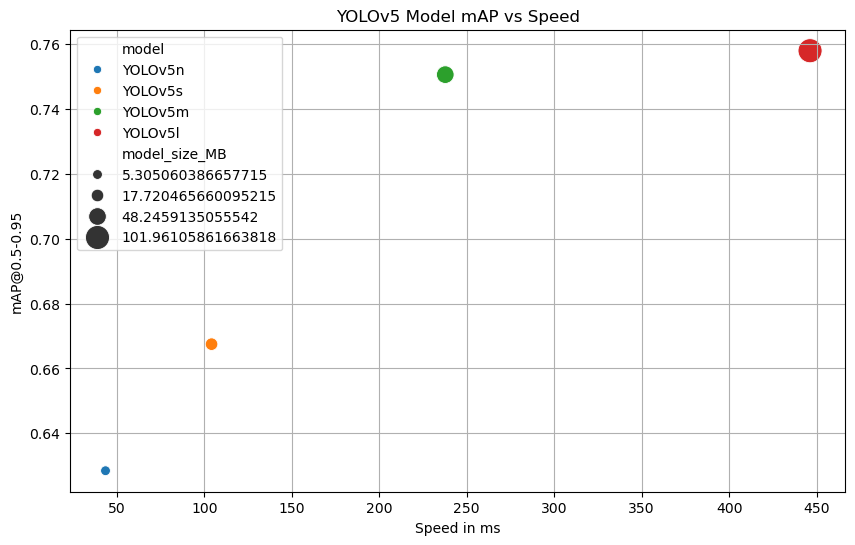

In [50]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="speed_ms", y="mAP50-95", hue="model", size="model_size_MB", sizes=(50,300))
plt.title("YOLOv5 Model mAP vs Speed")
plt.xlabel("Speed in ms")
plt.ylabel("mAP@0.5-0.95")
plt.grid(True)
plt.show()

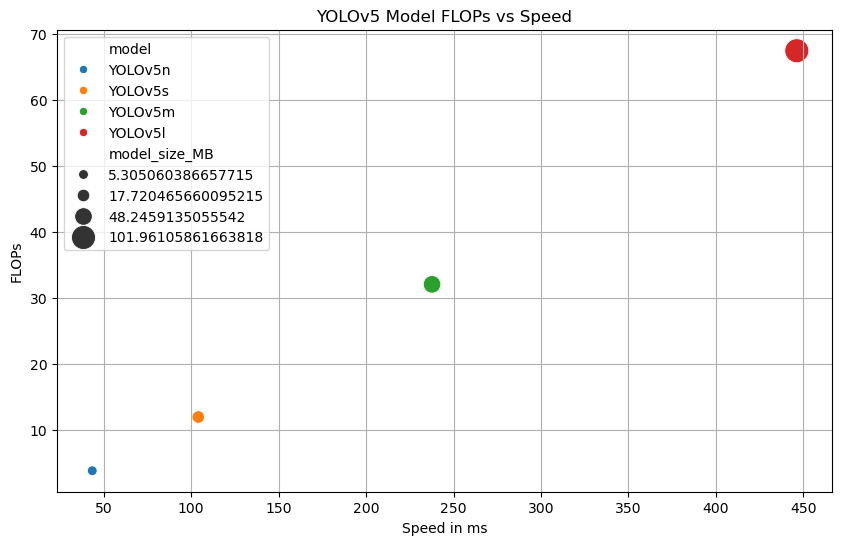

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="speed_ms", y="GFLOPs", hue="model", size="model_size_MB", sizes=(50,300))
plt.title("YOLOv5 Model FLOPs vs Speed")
plt.xlabel("Speed in ms")
plt.ylabel("FLOPs")
plt.grid(True)
plt.show()

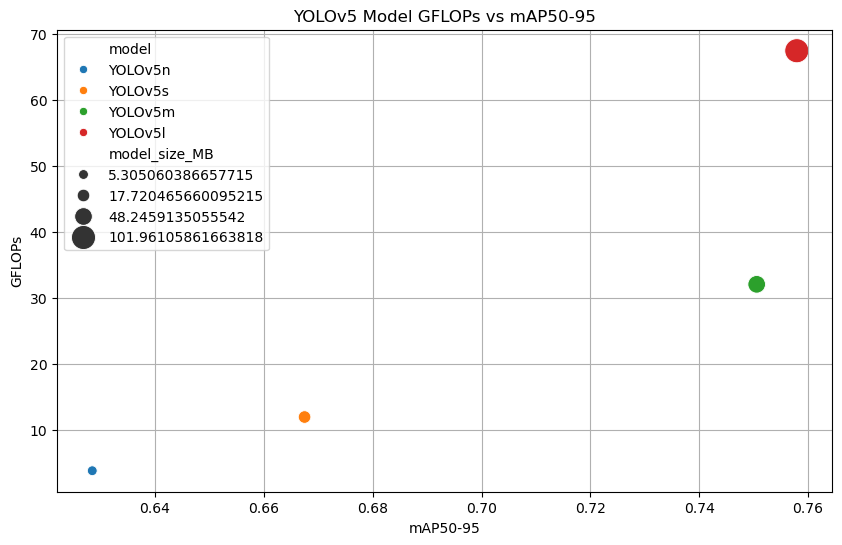

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="mAP50-95", y="GFLOPs", hue="model", size="model_size_MB", sizes=(50,300))
plt.title("YOLOv5 Model GFLOPs vs mAP50-95")
plt.xlabel("mAP50-95")
plt.ylabel("GFLOPs")
plt.grid(True)
plt.show()

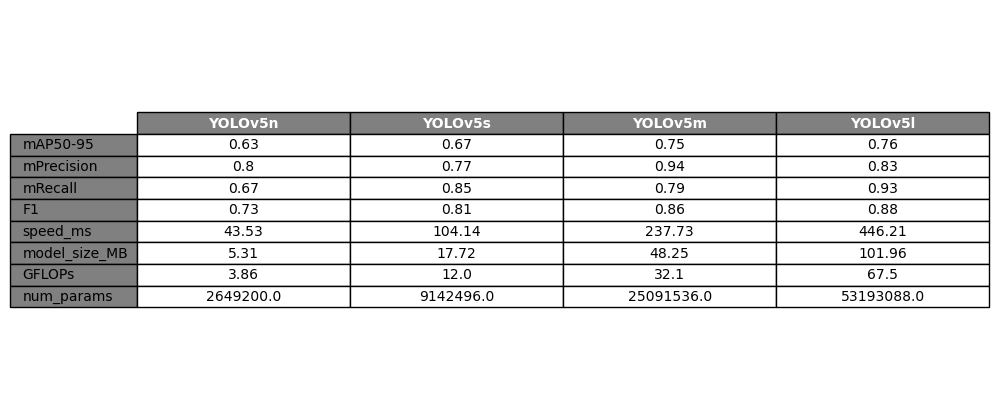

In [55]:
# Recrate datagrame for table display
# Rounding for better display
df = pd.DataFrame(model_metrics)
df = df.round(2)
fig, ax = plt.subplots(figsize=(10, 2 + 0.4 * len(df)))
ax.axis('off')

# Create table
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    rowLabels=df.index,
    loc='center',
    cellLoc='center'
)

# Table's Style
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.1, 1.3)

# Adding shading to header and first column
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('gray')
    elif col == -1:
        cell.set_facecolor('gray')

plt.show()
